In [2]:
# import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# Sử dụng thư viện glob để đọc ảnh
import glob

In [4]:
FOLDER_PATH = '/content/drive/MyDrive/XLA&TGMT/data'

In [5]:
file_path = glob.glob(FOLDER_PATH+'/*.jpg')

In [6]:
print(file_path)

['/content/drive/MyDrive/XLA&TGMT/data/a2.jpg', '/content/drive/MyDrive/XLA&TGMT/data/a3.jpg', '/content/drive/MyDrive/XLA&TGMT/data/a5.jpg', '/content/drive/MyDrive/XLA&TGMT/data/a7.jpg', '/content/drive/MyDrive/XLA&TGMT/data/a9.jpg', '/content/drive/MyDrive/XLA&TGMT/data/c2.jpg', '/content/drive/MyDrive/XLA&TGMT/data/c4.jpg', '/content/drive/MyDrive/XLA&TGMT/data/t4.jpg', '/content/drive/MyDrive/XLA&TGMT/data/c5.jpg', '/content/drive/MyDrive/XLA&TGMT/data/c3.jpg', '/content/drive/MyDrive/XLA&TGMT/data/c1.jpg', '/content/drive/MyDrive/XLA&TGMT/data/a8.jpg', '/content/drive/MyDrive/XLA&TGMT/data/a6.jpg', '/content/drive/MyDrive/XLA&TGMT/data/a4.jpg', '/content/drive/MyDrive/XLA&TGMT/data/Screenshot 2025-03-27 074616.jpg']


In [7]:
result = []

In [8]:
for file in file_path:
  img = cv2.imread(file,flags=1)
  result.append(img)

## Hàm chuyển từ ảnh màu sang ảnh xám

In [9]:
# Hàm chuyển màu từ ảnh màu sang ảnh xám
def Color2Gray(img):
  img = img.astype(float)
  img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
  img = img.astype(np.uint8)
  return img

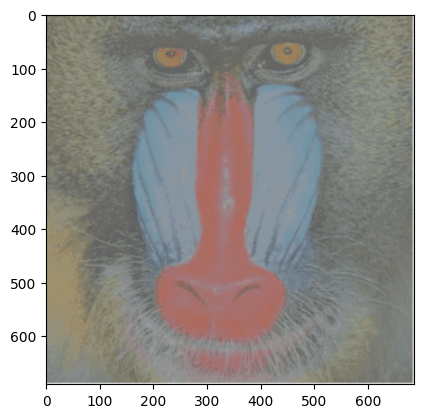

In [25]:
# example
# img0 = result[0]
# img0_gray = Color2Gray(img0)
# plt.imshow(img0[:,:,::-1])
img_path = '/content/drive/MyDrive/XLA&TGMT/data/Screenshot 2025-03-27 074616.jpg'
img0 = cv2.imread(img_path,flags=1)
img0_gray = Color2Gray(img0)
plt.imshow(img0[:,:,::-1])

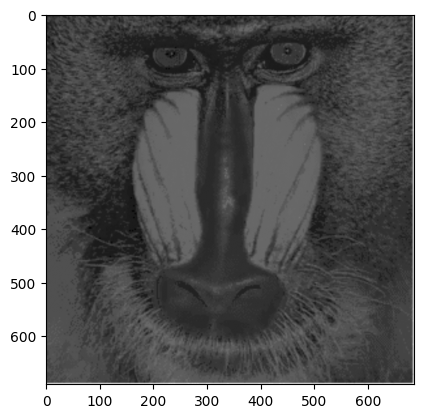

In [26]:
plt.imshow(img0_gray,cmap='gray')

In [27]:
def histogram_image(img):
  number_scale = np.arange(256)
  frequency_value = np.zeros(256,dtype=int)
  dict_img = dict(zip(number_scale,frequency_value))
  for value in img.flatten():
    dict_img[value] += 1
  plt.bar(list(dict_img.keys()),list(dict_img.values()))
  return dict_img

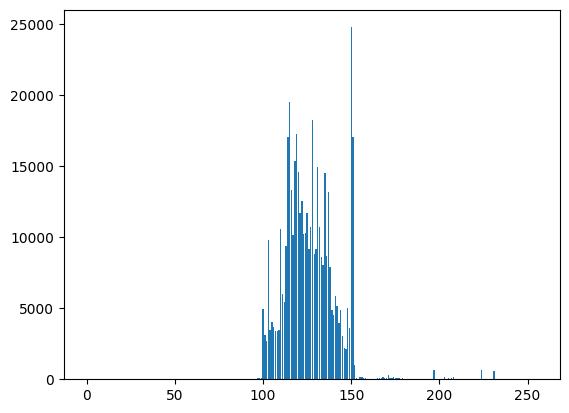

In [28]:
_ = histogram_image(img0_gray)

## Hàm Thay đổi độ sáng của ảnh

In [29]:
def ChangeBrightness(img,value):
  img = img.astype(float)
  img = img + value
  img = np.where(img>255,255,img)
  img = np.where(img<0,0,img)
  img = img.astype(np.uint8)
  return img


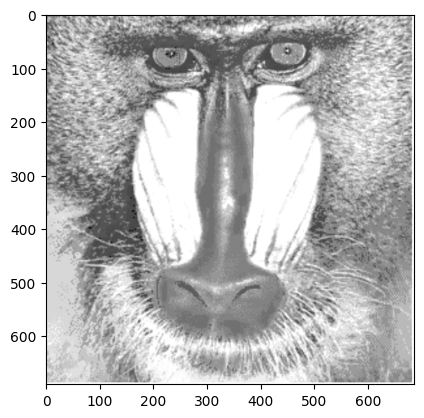

In [30]:
img0_gray_change_brighness = ChangeBrightness(img0_gray,110)
plt.imshow(img0_gray_change_brighness,cmap='gray')

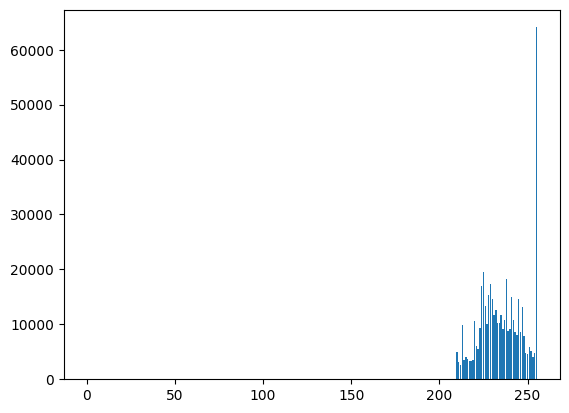

In [31]:
_ = histogram_image(img0_gray_change_brighness)

# Change_constrast

In [35]:
# Tăng giảm độ tương phản cho ảnh
def change_constrast(image):
  image = image.astype(float)
  lmax = 255
  lmin = 0
  min = np.min(image)
  print(f"min={min}")
  max = np.max(image)
  print(f"max={max}")
  image = (lmax-lmin)*((image-min)/(max-min)) + lmin
  image = image.astype(np.uint8)
  return image

min=82.0
max=251.0


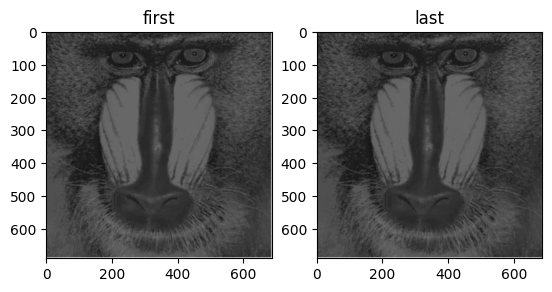

In [38]:
image_constrast = change_constrast(img0_gray)
plt.subplot(1,2,1)
plt.title("first")
plt.imshow(img0_gray,cmap='gray')
plt.subplot(1,2,2)
plt.title("last")
plt.imshow(image_constrast,cmap='gray')

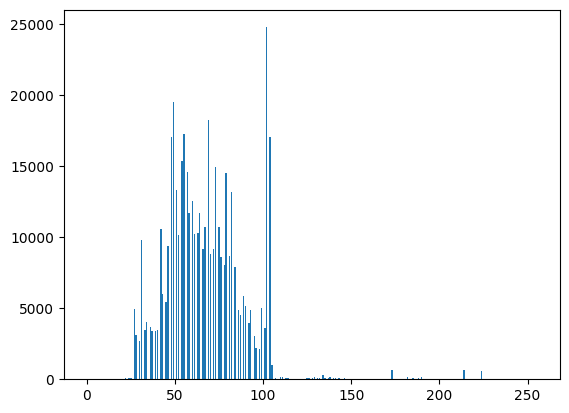

In [39]:
_ = histogram_image(image_constrast)

# Histogram equalization

In [46]:
# Hàm lấy các thông số liên quan đến histogram
def Parameter_histogram(img):
  histogram_dict = { i:0 for i in range(256)}
  for intensity in img.flatten():
    histogram_dict[intensity] += 1
  intensity = np.array(list(histogram_dict.keys()))
  frequency = np.array(list(histogram_dict.values()))
  PMF = frequency/img.size
  CDF = PMF.cumsum()
  return intensity, frequency, PMF, CDF

In [42]:
def histogram_equalization(img,CDF):
  img_equalization = None
  for i in range(256):
    img_equalization = np.where(img==i,np.clip(255*CDF[i],0,255),img_equalization)
  return img_equalization.astype(np.uint8)

In [43]:
intensity, frequency, PMF ,CDF = Parameter_histogram(img0_gray)

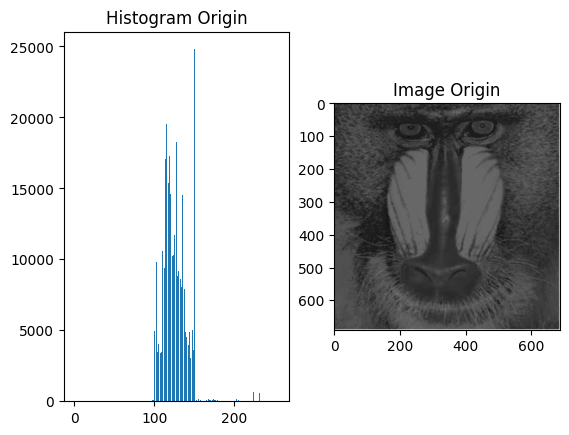

In [51]:
# Vẽ biểu đồ histogram của ảnh ban đầu
plt.subplot(1,2,1)
plt.title("Histogram Origin")
plt.bar(intensity,frequency)
plt.subplot(1,2,2)
plt.title("Image Origin")
plt.imshow(img0_gray,cmap='gray')

In [52]:
image_equalization = histogram_equalization(img0_gray,CDF)

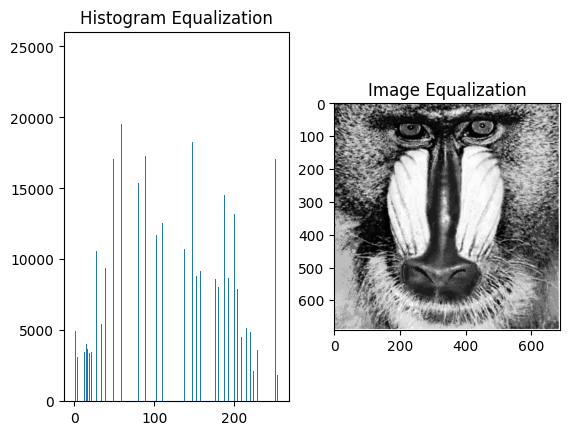

In [54]:
# Hiển thị biểu đồ histogram sau khi cân bằng và ảnh của nó sau khi cân bằng
intensity, frequency, PMF ,CDF = Parameter_histogram(image_equalization)
plt.subplot(1,2,1)
plt.title("Histogram Equalization")
plt.bar(intensity,frequency)
plt.subplot(1,2,2)
plt.title("Image Equalization")
plt.imshow(image_equalization,cmap='gray')